# Hourly Energy Consumption_Future Prediction(2monthLater)_using LSTM

Reference : https://soumilshah1995.blogspot.com/2019/08/project-data-analysis-and.html
    
    

# Vorsicht ! 
 - float() argument must be a string or a number, not 'Timestamp' 오류등에 대해 다음의 것을 사용하면 에러를 잡을 수 있지만, numpy values 변환시 에러 발생한다.
 #### pd.plotting.register_matplotlib_converters()

In [74]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
df = pd.read_csv("AEP_hourly.csv")


In [3]:
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),'\n')

print("="*50)
print("Information About Dataset ","\n")
print(df.info(),'\n')

print("="*50)
print("Describe the Dataset","\n")
print(df.describe(),'\n')

print("="*50)
print("Null Values ","\n")
print(df.isnull().sum(),'\n')

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

Information About Dataset  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset 

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values  

Datetime    0
AEP_MW      0
dtype: int64 



# Extracting Features from Dataset

In [4]:
# Datetime을 Month	Year	Date	Time	Week	Day 으로 쪼개기
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [5]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(), "\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

# unique는 값 나열
# nunique는 갯수 세기

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



# Data Visualization


## Check The Energy Consumption Each Year

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

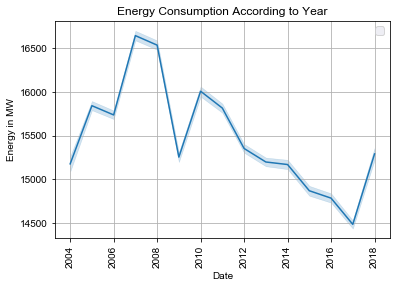

In [6]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(10,6)})

plt.title("Energy consumptionning Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90) # x축 라벨을 90도 돌림
    
plt.title("Energy Consumption According to Year")

## Check The Energy Consumption Each Month

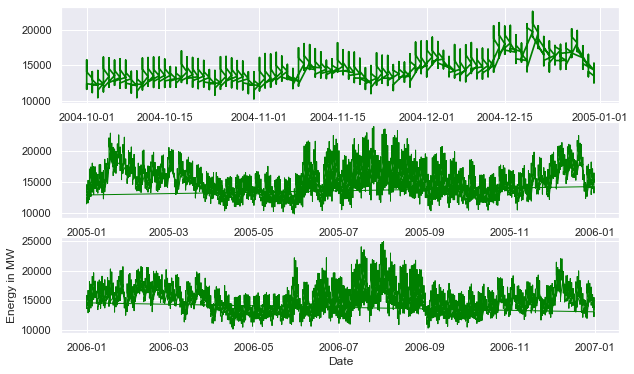

In [7]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

style.use('ggplot')

plt.rcParams["figure.figsize"] = (18,8)
#plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
#plt.grid(True, alpha=1)
#plt.legend()

# 2004~ 2005
y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004, y_2004, color="green", linewidth=1.7)

# 2005~ 2006
y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)

# 2006~ 2007
y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)

# 여름시즌에 확실히 많이 증가하는 것을 확인

Text(0.5, 1.0, 'Energy Distribution')

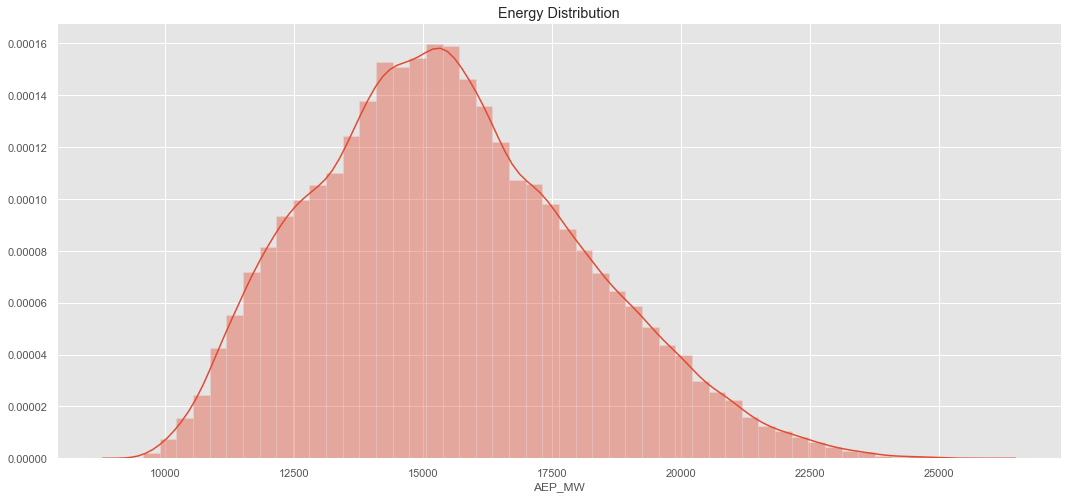

In [8]:
# Check usage distribution

sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

## Check The Energy Consumption Time (Day and Night)

No handles with labels found to put in legend.


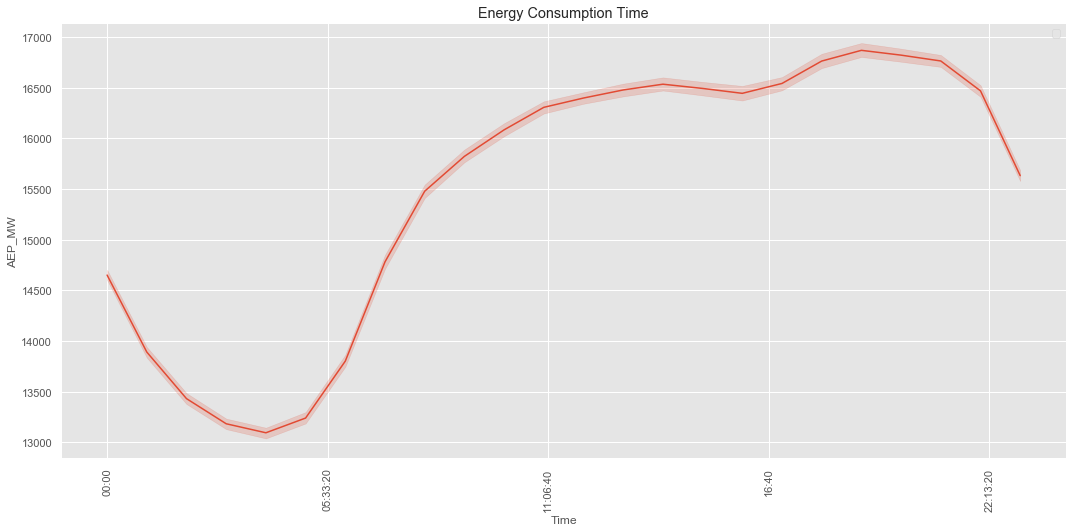

In [73]:
# Solution to 'float() argument must be a string or a number, not 'datetime.time' ''
pd.plotting.register_matplotlib_converters()

fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(x=dataset["Time"], y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption Time")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90) # x축 라벨을 90도 돌림

# Resampling the Data

In [10]:
NewDataSet = dataset.resample('D').mean()
# 일 시점으로 데이터 나눔

In [11]:
print(NewDataSet)

                  AEP_MW  Month  Year  Week
Datetime                                   
2004-10-01  14284.521739     10  2004    40
2004-10-02  12999.875000     10  2004    40
2004-10-03  12227.083333     10  2004    40
2004-10-04  14309.041667     10  2004    41
2004-10-05  14439.708333     10  2004    41
...                  ...    ...   ...   ...
2018-07-30  15368.083333      7  2018    31
2018-07-31  15180.291667      7  2018    31
2018-08-01  15151.166667      8  2018    31
2018-08-02  15687.666667      8  2018    31
2018-08-03  14809.000000      8  2018    31

[5055 rows x 4 columns]


In [12]:
print(dataset)

                      AEP_MW  Month  Year        Date      Time  Week      Day
Datetime                                                                      
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53   Friday
2004-12-31 02:00:00  12865.0     12  2004  2004-12-31  02:00:00    53   Friday
2004-12-31 03:00:00  12577.0     12  2004  2004-12-31  03:00:00    53   Friday
2004-12-31 04:00:00  12517.0     12  2004  2004-12-31  04:00:00    53   Friday
2004-12-31 05:00:00  12670.0     12  2004  2004-12-31  05:00:00    53   Friday
...                      ...    ...   ...         ...       ...   ...      ...
2018-01-01 20:00:00  21089.0      1  2018  2018-01-01  20:00:00     1   Monday
2018-01-01 21:00:00  20999.0      1  2018  2018-01-01  21:00:00     1   Monday
2018-01-01 22:00:00  20820.0      1  2018  2018-01-01  22:00:00     1   Monday
2018-01-01 23:00:00  20415.0      1  2018  2018-01-01  23:00:00     1   Monday
2018-01-02 00:00:00  19993.0      1  2018  2018-01-0

# DL Modeling

In [34]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense
from keras import optimizers

In [14]:
print("Old One", dataset.shape)
print("New One", NewDataSet.shape)

Old One (121273, 7)
New One (5055, 4)


In [15]:
testdata = NewDataSet.tail(100)

trainingdata = NewDataSet.iloc[:,0:1]

trainingdata = trainingdata[:-60]
#(왜 20180605~ 2018-08-03  까지 데이터를 삭제?)

In [16]:
testdata

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17
2018-04-28,12237.583333,4,2018,17
2018-04-29,12156.791667,4,2018,17
2018-04-30,13443.500000,4,2018,18
...,...,...,...,...
2018-07-30,15368.083333,7,2018,31
2018-07-31,15180.291667,7,2018,31
2018-08-01,15151.166667,8,2018,31


In [17]:
print(trainingdata)

                  AEP_MW
Datetime                
2004-10-01  14284.521739
2004-10-02  12999.875000
2004-10-03  12227.083333
2004-10-04  14309.041667
2004-10-05  14439.708333
...                  ...
2018-05-31  16741.083333
2018-06-01  15734.666667
2018-06-02  14212.166667
2018-06-03  13824.625000
2018-06-04  14127.500000

[4995 rows x 1 columns]


In [18]:
print("Training Set Shape", trainingdata.shape)
print("Test Set Shape", testdata.shape)

Training Set Shape (4995, 1)
Test Set Shape (100, 4)


In [19]:
trainingdata = trainingdata.values
#pd.plotting.register_matplotlib_converters() 적용시 values 에러 남
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(trainingdata)

In [20]:
print(Train)

[[0.27243207]
 [0.16328467]
 [0.09762599]
 ...
 [0.26628457]
 [0.23335788]
 [0.25909104]]


In [22]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])
    
# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [23]:
# convert into dimension
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [35]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





4935/4935 [==============================] - 20s 4ms/step - loss: 0.0233
Epoch 2/50
4935/4935 [==============================] - 18s 4ms/step - loss: 0.0183
Epoch 3/50
4935/4935 [==============================] - 18s 4ms/step - loss: 0.0171
Epoch 4/50
4935/4935 [==============================] - 18s 4ms/step - loss: 0.0164
Epoch 5/50
4935/4935 [==============================] - 17s 3ms/step - loss: 0.0161
Epoch 6/50
4935/4935 [==============================] - 19s 4ms/step - loss: 0.0151
Epoch 7/50
4935/4935 [==============================] - 18s 4ms/step - loss: 0.0148
Epoch 8/50
4935/4935 [==============================] - 18s 4ms/step - loss: 0.0129
Epoch 9/50
4935/4935 [==============================] - 18s 4ms/step - loss: 0.0104
Epoch 10/50
4935/4935 [==============================] - 18s 4ms/step - loss: 0.0093
Epoch 11/50
4935/4935 [==============================] - 

# Test Data!

In [42]:
testdata.head(1000)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17
2018-04-28,12237.583333,4,2018,17
2018-04-29,12156.791667,4,2018,17
2018-04-30,13443.500000,4,2018,18
...,...,...,...,...
2018-07-30,15368.083333,7,2018,31
2018-07-31,15180.291667,7,2018,31
2018-08-01,15151.166667,8,2018,31


In [61]:
df_Total = pd.concat((NewDataSet[["AEP_MW"]], testdata[["AEP_MW"]]), axis=0)
df_Total.shape

inputs = df_Total[len(df_Total) - len(testdata) - 60:].values
inputs.shape


(160, 1)

In [64]:
inputs = df_Total[len(df_Total) - len(testdata) - 60:].values

In [65]:

# Reshape
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Cnvert into Numpy Array
X_test = np.array(X_test)

# Reshape LSTM shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predict_usage = regressor.predict(X_test)

# Do inverse Transformation to get Values 이 부분이 소숫점을 정수형으로 변환시켜주는 중요한 부분

predict_usage = sc.inverse_transform(predict_usage)

In [68]:
True_MegaWatt = testdata["AEP_MW"].to_list()
Predicted_MegaWatt  = predict_usage
dates = testdata.index.to_list()

DL_df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [69]:
DL_df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13418.952148
1,2018-04-27,12964.000000,13060.151367
2,2018-04-28,12237.583333,14952.250977
3,2018-04-29,12156.791667,13515.177734
4,2018-04-30,13443.500000,13022.011719
...,...,...,...
95,2018-07-30,15368.083333,15569.683594
96,2018-07-31,15180.291667,16157.349609
97,2018-08-01,15151.166667,14812.167969
98,2018-08-02,15687.666667,15078.530273


# Predict Future 2 Months later

In [70]:
True_MegaWatt = testdata["AEP_MW"].to_list()
Predicted_MegaWatt = [x[0] for x in Predicted_MegaWatt]

dates = testdata.index.to_list()

No handles with labels found to put in legend.


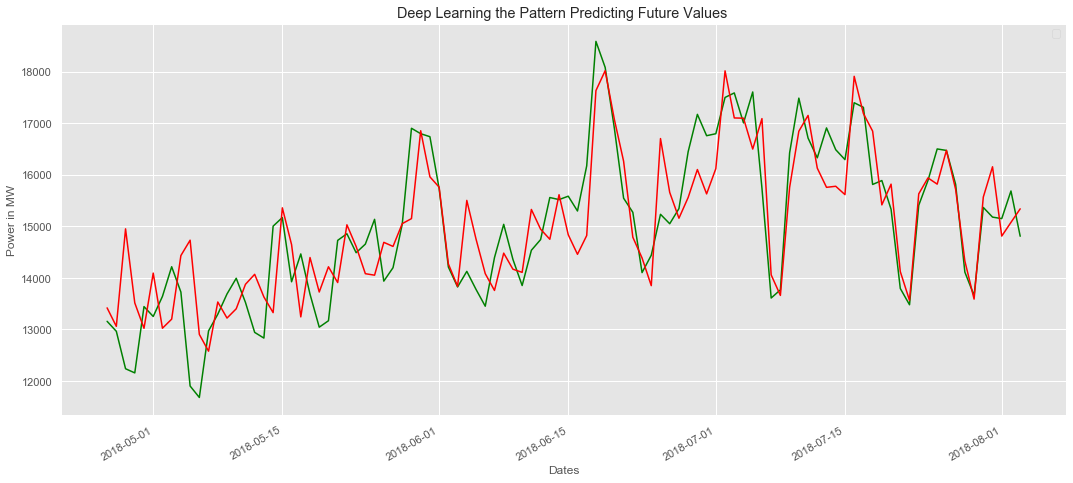

In [72]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

x = dates
y = True_MegaWatt
y1 = Predicted_MegaWatt

pd.plotting.register_matplotlib_converters()

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")

plt.gcf().autofmt_xdate()

plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Deep Learning the Pattern Predicting Future Values ")
plt.legend()